In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [ ]:
N = 1000 #População total

#Número incial de cada compartimento
I_inicial = 1
S_inicial = N - I_inicial
E_inicial = 0
Im_inicial = 0
M_inicial = 0

In [ ]:
#Taxas
a = 0.005 #taxa de exposição
b = 0.1  #taxa de infecção
c = 0.3  #taxa de mortalidade
d = 0.003 #taxa de recuperação
e = 0     #taxa de vacinação

In [ ]:
#Tempo (em dias)
t = np.linspace(0, 360, 360)

In [ ]:
#Equações
#Python é case sensitive, ou seja, e != E
def funcoes(compartimentos, t, N, a, b, c, d, e):
  S, E, I, Im, M = compartimentos
  dSdt = -((a * I * S) + (e * S))
  dEdt = (a * I * S) - (b * E) 
  dIdt = (b * E) - (d * I) 
  dImdt = d * (1 - c) * I
  dDdt = c * d * I

  return dSdt, dEdt, dIdt, dImdt, dDdt

In [ ]:
compartimentos_iniciais = S_inicial, E_inicial, I_inicial, Im_inicial, M_inicial
ret = odeint(funcoes, compartimentos_iniciais, t, args=(N, a, b, c, d, e))
S, E, I, Im, M = ret.T 

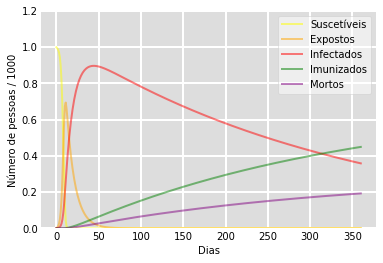

In [ ]:
#Exibe o gráfico
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S/N, 'yellow', alpha=0.5, lw=2, label='Suscetíveis')
ax.plot(t, E/N, 'orange', alpha=0.5, lw=2, label='Expostos')
ax.plot(t, I/N, 'r', alpha=0.5, lw=2, label='Infectados')
ax.plot(t, Im/N, 'g', alpha=0.5, lw=2, label='Imunizados')
ax.plot(t, M/N, 'purple', alpha=0.5, lw=2, label='Mortos')
ax.set_xlabel('Dias')
ax.set_ylabel('Número de pessoas / 1000')
ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()